In [1]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm


from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
from mpl_toolkits.mplot3d import Axes3D


Using TensorFlow backend.


In [2]:

    

left_edge  = [0, 2.5]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 21

x_positions_all = {}
y_positions_all = {}
z_positions_all = {}
r_positions_fiducial_all = {}
r_positions_all = {}
drift_time_all = {}


run_list = ['00158', '00178']
#-----------kr-------cs----------#
for run in run_list:
    
    def CutCondition(waveform, integral,width,i):  
        
        if run == '00158':
            
            FirstPeak_area = sum(waveform[:15])
            SecondPeak_area = sum(waveform[15:])    
            if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
                return(True)
            else:
                return(False)
        if run == '00178':
            
            if integral[i] > 100 and integral[i] < 4000 and width[i] > 30 and width[i] < 50:
                return(True)
            else:
                return(False)

    
    def PrintWaveform(waveform,i):

        fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,sharex=False, figsize=(30, 5))
        ax1.plot(waveform[i])
        ax2.plot(waveform[i+1])
        ax3.plot(waveform[i+2])
        ax4.plot(waveform[i+3])
        ax5.plot(waveform[i+4])
        ax6.plot(waveform[i+5])
        ax7.plot(waveform[i+6])
        plt.show()


    def drifttime_to_z(t):
        return a * t + b

    def S2_found(integral, width):
        #maximum_S2 = max(waveform)
        if integral > 500 and width >200 and width < 2000:
            return True
        else:
            return False

    
    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(waveform[i], integral, width, i)
        if SelectionCutFlag == True:


            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):  
                    k=1 
                    s2_counter_timestamp = timestamp[i+j+k]
                    while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                        k += 1
                        s2_counter_timestamp = timestamp[i+j+k]
                    else:
                        if threshold_timestamp <= s2_counter_timestamp:
                            r_position = np.sqrt(x_position[i+j]**2 + y_position[i+j]**2)
                            z_position = drifttime_to_z(timestamp[i+j] - timestamp[i])
                            time       = timestamp[i+j] - timestamp[i]
                            drift_time.append(time)
                            r.append(r_position)
                            if r_position <= fiducial_r and z_position >= -75:
                                r_fiducial.append(r_position)
                                x.append(x_position[i+j])
                                y.append(y_position[i+j])

                                z.append(z_position)





                    return
                else:
                    return




    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    position_data = ctx.get_array(run, 'peak_positions')

    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    timestamp = peaks_data['time']
    x_position = position_data['x']
    y_position = position_data['y']

    drift_time = []  
    z = []
    r = []
    r_fiducial = []
    x = []
    y = []
    
    x_positions_all.update({run:x})
    y_positions_all.update({run:y})
    z_positions_all.update({run:z})
    r_positions_fiducial_all.update({run:r_fiducial})
    r_positions_all.update({run:r})
    drift_time_all.update({run:drift_time})

    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00158 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00178 done!


<IPython.core.display.Javascript object>


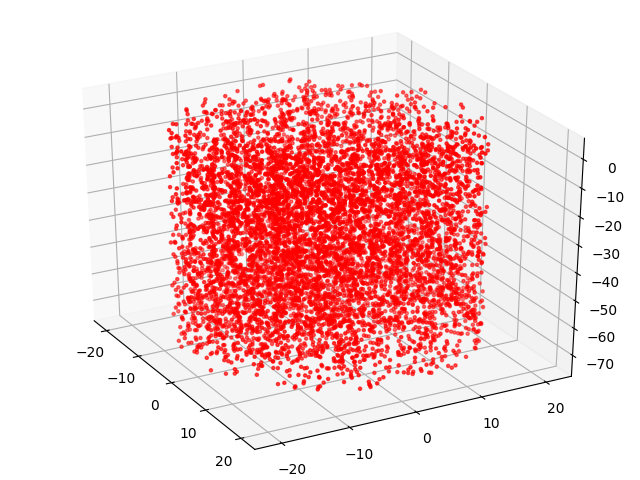

In [7]:
fig = plt.figure()
ax = Axes3D(fig)




ax.scatter(x_positions_all['00158'], y_positions_all['00158'], z_positions_all['00158'], c='r', marker='o',s=5)
plt.show()

<IPython.core.display.Javascript object>


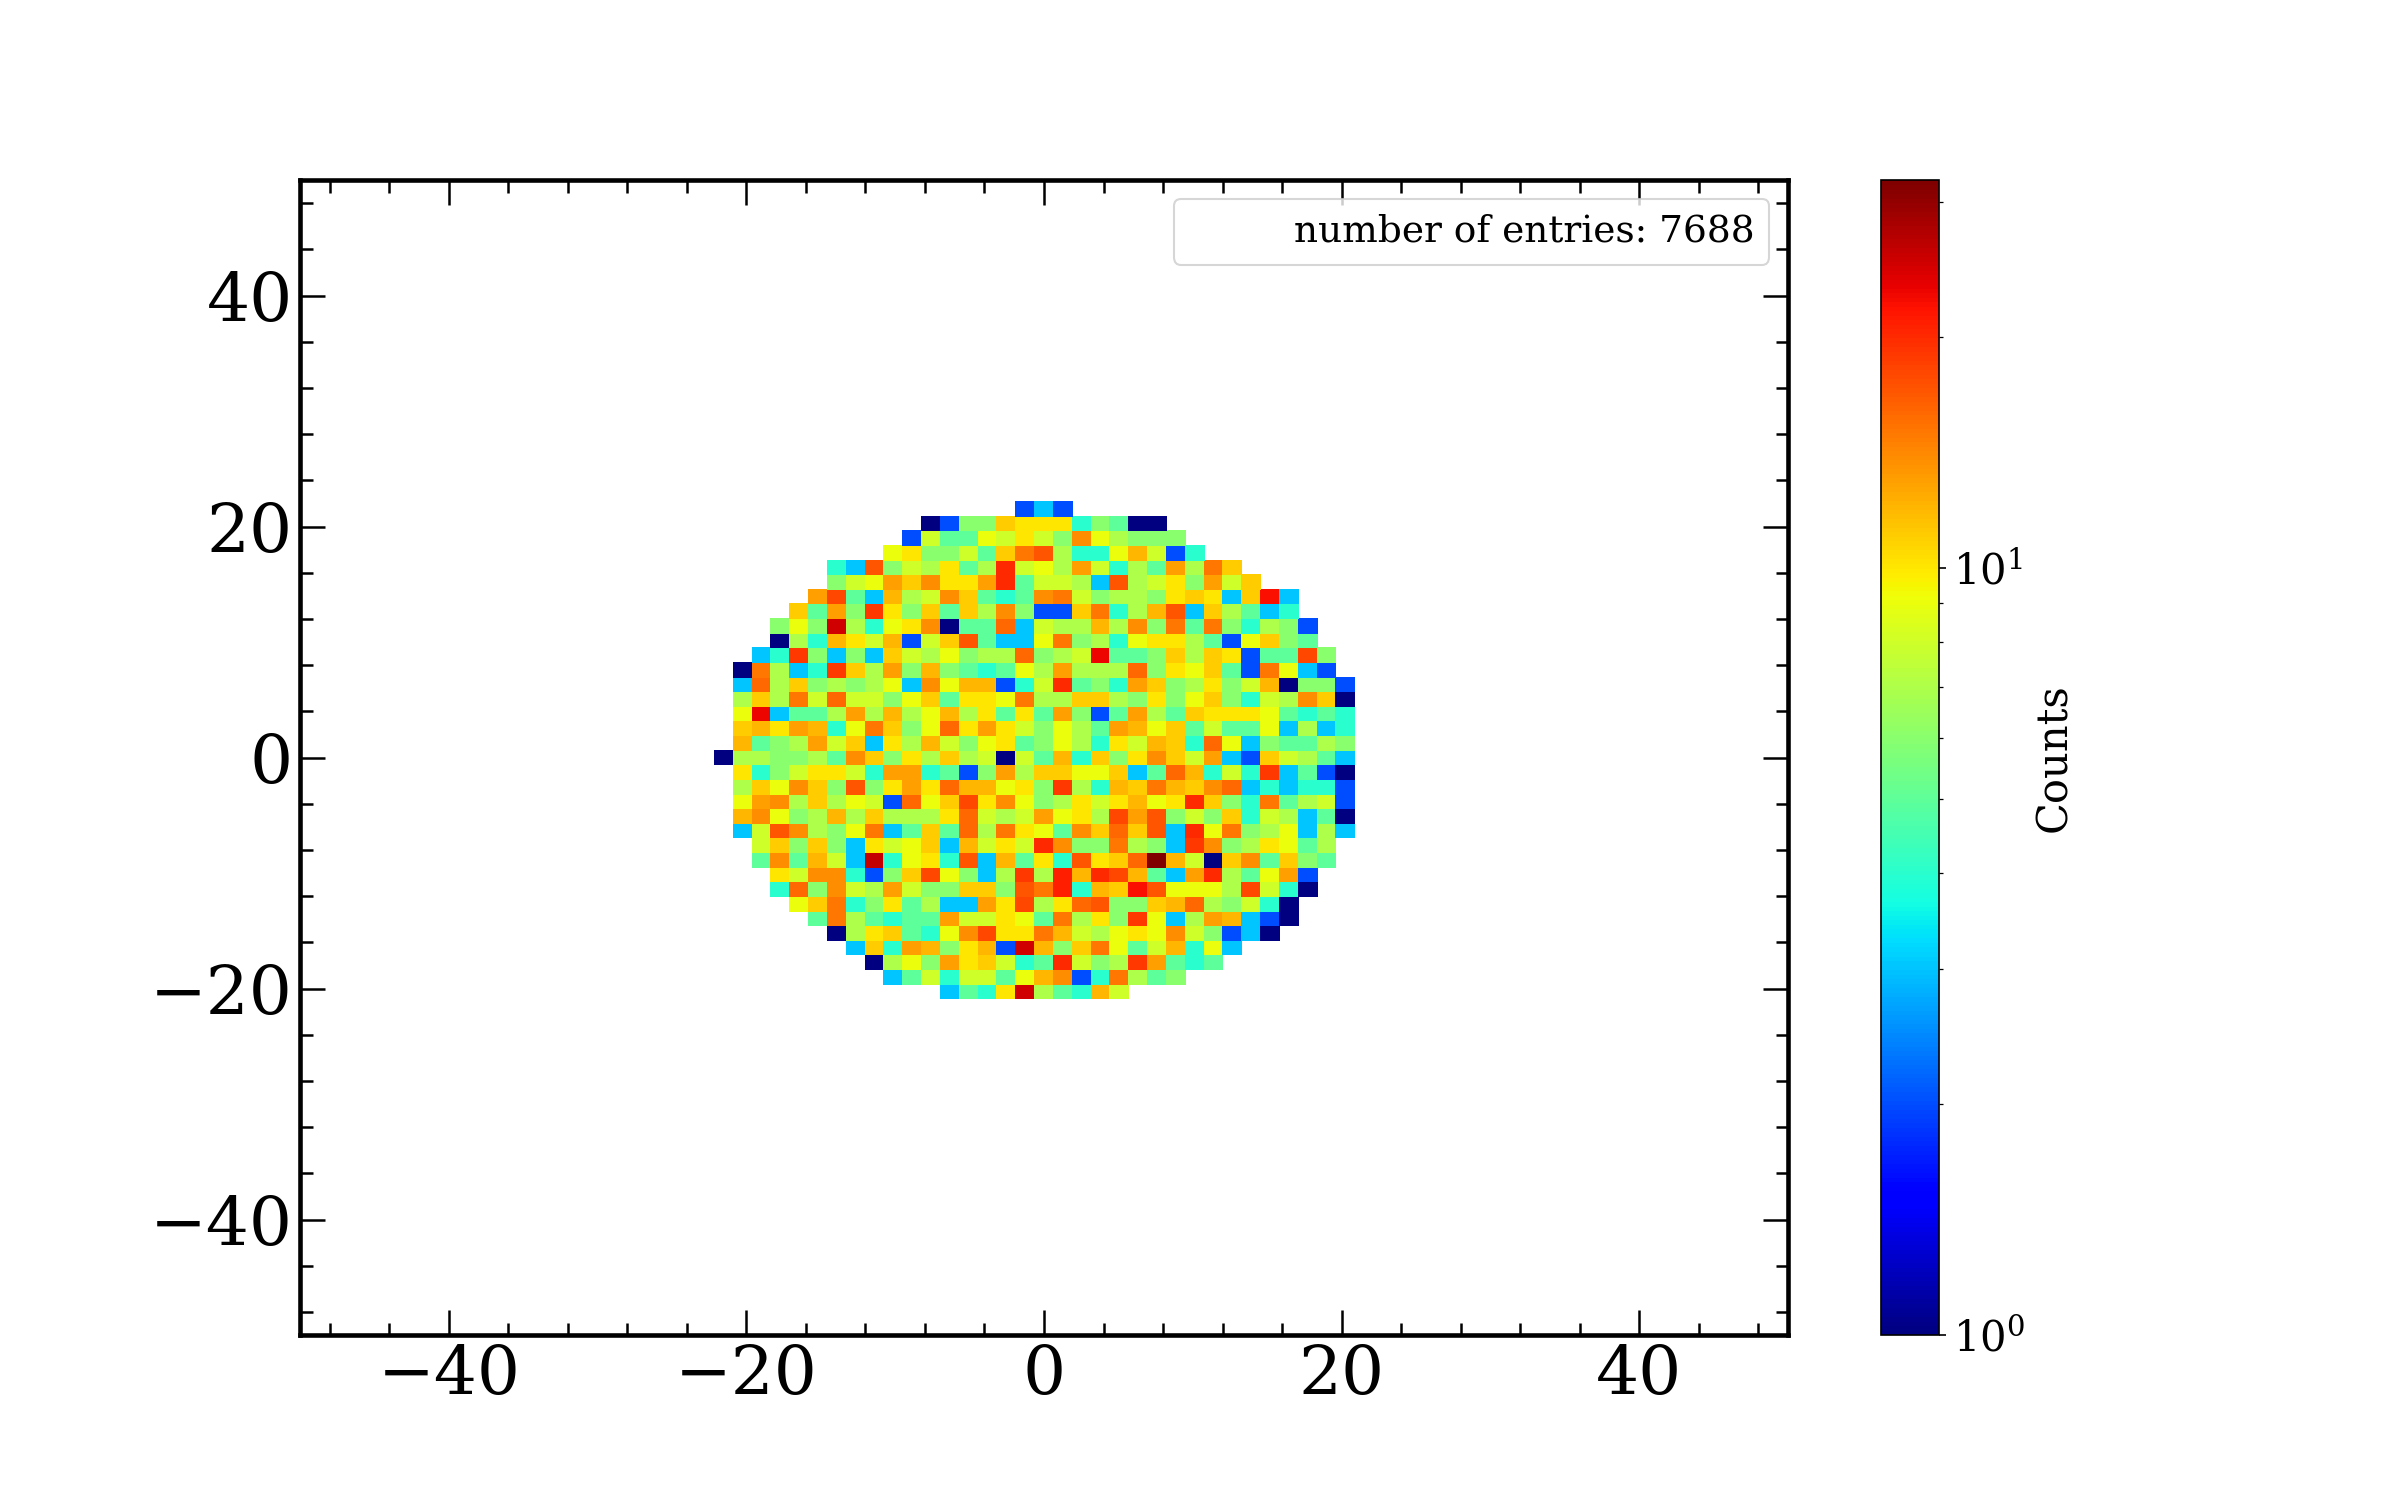

In [11]:
x_position = np.array(x_positions_all['00158'])
y_position = np.array(y_positions_all['00158'])
x_position.shape


fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

bins_x = np.linspace(-50,50,80)
bins_y = np.linspace(-50,50,80)




counts_cs, _, _ = np.histogram2d(x_position,y_position, bins=(bins_x, bins_y))


im = axes.pcolormesh(bins_x, bins_y, counts_cs.T, norm=mpl.colors.LogNorm(), cmap = 'jet')

##cb = plt.colorbar(im, ax=axes2, label='Counts')
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20)
#cb.ax.tick_params(labelsize=20) 
axes.plot([], [], ' ', label="number of entries: "+str(len(x_position)))


axes.legend(loc=1, prop={'size': 18})

plt.show()
